This notebook is for quickly determining what stddev for pixel values in an image can be used to determine which images are at night and not worth evaluating.

1. Load each image
2. Find the stddev of the resulting numpy matrix of pixel values
3. Plot all values in a scatter plot (to see jumps) and histogram to see distribution



In [5]:
from tqdm import tqdm
import cv2
import numpy as np
import os

In [2]:
IMAGE_DIR = 'images'

# Sorted by date/time images are taken
images = sorted(list(map(
    lambda x: '.'.join(x.split('.')[:-1]),
    filter(
        lambda x: x.endswith('.jpg'),
        os.listdir(IMAGE_DIR),
    )
)))

In [3]:
def get_std(path):
    image = cv2.imread(path)
    stddev = np.std(image)
    
    return stddev

In [6]:
stds = []
for image in tqdm(images):
    path = f'{IMAGE_DIR}/{image}.jpg'
    stds.append(get_std(path))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14661/14661 [01:24<00:00, 172.84it/s]


In [7]:
import matplotlib.pyplot as plt

In [8]:
print(stds[:10])

[np.float64(66.31632322550082), np.float64(66.31105088141447), np.float64(66.2853845876984), np.float64(66.275298463551), np.float64(66.29843947583247), np.float64(66.33988619222781), np.float64(66.01458838895192), np.float64(64.68680820750095), np.float64(64.90777111667987), np.float64(65.5308057464092)]


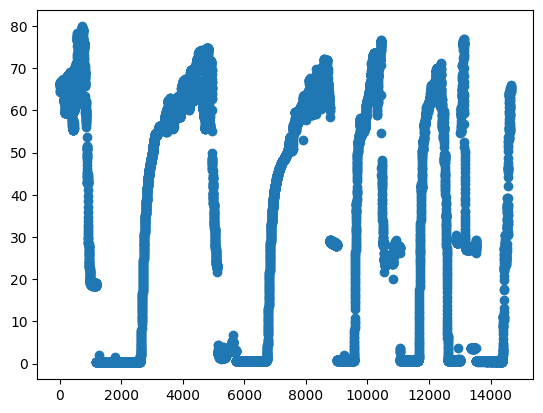

In [13]:
plt.scatter(list(range(len(stds))), stds)

(array([5590.,   95.,   64.,   50.,  258.,  226.,  814.,  480.,  168.,
         164.,  246.,  360.,  410.,  664., 1210., 1393., 1121.,  756.,
         464.,  128.]),
 array([ 0.28132278,  4.26167684,  8.2420309 , 12.22238495, 16.20273901,
        20.18309307, 24.16344713, 28.14380118, 32.12415524, 36.1045093 ,
        40.08486335, 44.06521741, 48.04557147, 52.02592552, 56.00627958,
        59.98663364, 63.96698769, 67.94734175, 71.92769581, 75.90804987,
        79.88840392]),
 <BarContainer object of 20 artists>)

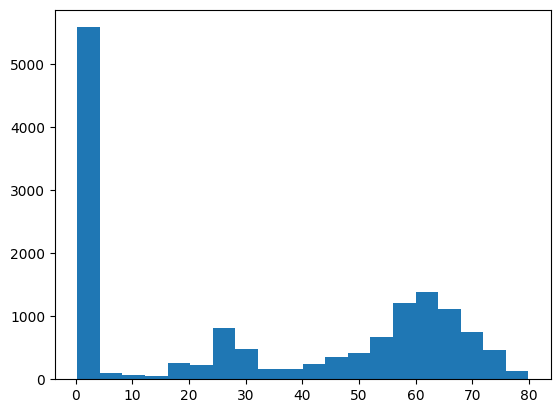

In [11]:
plt.hist(stds, bins=20)

# Conclusion
$\sigma = 15$ seems to be the best value for a threshold for "dark" images.

The jumps down on the scatter plot are probably from me turning my lights off at night (suddenly dark) vs the gradual ramp up in the morning is from the sunrise. 